# Rules of the data vizualisation game


All figures are underlied by data. A figure is not the data itself, it is the data viewed from one of many possible perspectives. 

Good figures are separated from bad figures by how easily readers can share your perspective of the data. That is, the reader can understand the message your figure is showing, and how that message is supported by the underlying data. (more on this in _Section 3.4_).  

There are some key components of every figure that need decided upon, whether implicity or explicitly.

This section provides an overview of these. We will see how these components contribute to readable, expressive figures.

To illustrate these we will use data on Covid-19 hosted by [our world in data](https://github.com/owid/covid-19-data/tree/master/public/data/).

First, we will import that packages we will use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors #we will need this later

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_style("white")

## Mapping data onto Aesthetics

Figure creation is the process of mapping data to graphical features. We will call these features **aesthetics**.

**Aesthetics** may have some or all of the following components:

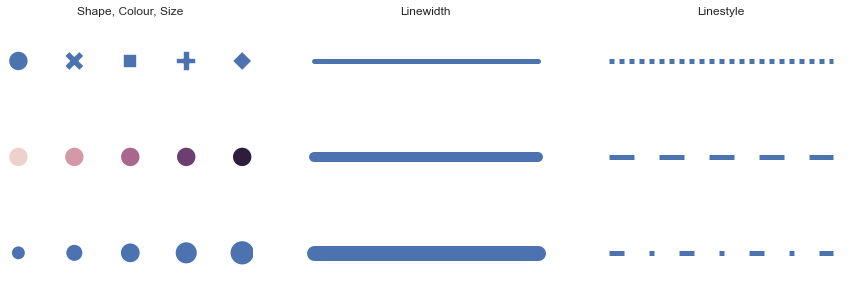

In [2]:

# fake data
n = 5 
x = np.arange(n)
y = [1] * n


f, axes = plt.subplots(3,3, figsize=(15,5))

#shape, size, colour, 
minsize=400
sns.scatterplot(x=x,y=y, ax=axes[0,0], style=x, legend=False, s=minsize)
sns.scatterplot(x=x,y=y, ax=axes[1,0], hue=x, legend=False, s=minsize)
sns.scatterplot(x=x,y=y, ax=axes[2,0], size=x, legend=False, sizes=(minsize*.5,minsize*1.5))


# line width
lw =5
sns.lineplot(x=x, y=y, ax=axes[0,1], size=y, legend=False, sizes=[lw])
sns.lineplot(x=x, y=y, ax=axes[1,1], size=y, legend=False, sizes=[lw*2])
sns.lineplot(x=x, y=y, ax=axes[2,1], size=y, legend=False, sizes=[lw*3])

# linestyle
sns.lineplot(x=x, y=y, ax=axes[0,2], style=y, size=y, legend=False, dashes=[(1,1)], sizes=[lw])
sns.lineplot(x=x, y=y, ax=axes[1,2], style=y, size=y, legend=False, dashes=[(5,5)], sizes=[lw])
sns.lineplot(x=x, y=y, ax=axes[2,2], style=y, size=y, legend=False, dashes=[(3,5,1,5)], sizes=[lw])


def remove_axes(ax):
    
    """ remove spines and ticks from a given axes """
    ax.set(yticklabels=[])
    ax.set(xticklabels=[])
    ax.tick_params(left=False, bottom=False)
    sns.despine(ax=ax, top=True,right=True,left=True,bottom=True)


for ax in axes.flatten(): remove_axes(ax)

#Set titles    
axes[0,0].set_title('Shape, Colour, Size')
axes[0,1].set_title('Linewidth')
axes[0,2].set_title('Linestyle')

plt.show()

## Coordinate Systems and Axes

[Section reference](https://clauswilke.com/dataviz/coordinate-systems-axes.html)

In addition to those properties outlined above, every aesthetic element also has a **position**. The position is given relative to a set of position scales which have a particular geometric arrangement. This is called a **coordinate system**.

Let's load the data. 

In [3]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

We can see that each country row is for a specific date for a specific country. To illustrate the importance of coordinate systems let us assess how wealth inequalities affects the spread of covid. To do this we will use the _cumulative number of cases_. However, if a country has more people it clearly may have more cases. So we will visualise the `total_cases_per_million`, which is normalised against population, against a measure of economic output per citizen, `gdp_per_capita`. 

````{margin}
```{note}
**Normalisation** is a key consideration in data visualisation. Normalisation is the process of ensuring that variables are measured on the same scale. In this example, `total cases` has been divided by population (in millions), so that the variable is comparable across countries with different populations. 
```
````{margin}

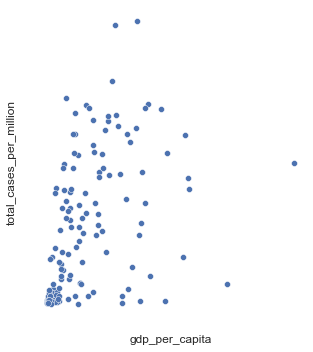

In [4]:
df_countries = df[df['continent'].notna()]

# select 'iso_code', 'location', 'gdp_per_capita' and any columns that start with 'total'
df_totals = df_countries.query('population > 1e+6').filter(regex="iso|loc|pop|cont|total|gdp *", axis = 1).groupby('location').max()
sns.relplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million')
remove_axes(plt.gca())
plt.show()

This plot is next to useless without a coordinate system for us to interpret the graph. Though it does have labels! 

The most common coordinate system is **Cartesian**. In a cartesian coordinate system each point is uniquely specified by a numeric pair $(x,y)$, where $x$ corresponds to a position along the horizontal axis (the abscissa) and $y$ refers to a position along the vertical axis (the ordinate).

The two axes can have different **units**. In our example a single unit increase in `total_cases_per_million` is means a very different thing to a single unit increase in `gdp_per_capita`.

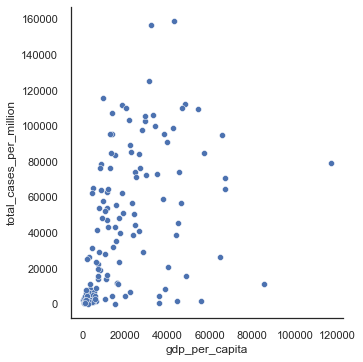

In [5]:
sns.relplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million')
plt.show()

Adding axes improves matters a little (we at least know the direction of the axes), but clearly the current coordinate system is a poor choice for seeing patterns in the data since all the data is bunch at low y-axis values of `total_cases_per_million`.

This is because a cartesian coordinate system is complete when you set **axes limits**. By default, most plotting libraries match these limits to your data, but if you have outliers this may be inappropriate.

Setting **limits** keeps the same units along your axes but excludes data that falls outside your limits.
<!--Note about limits and cutting data, open-ended limits -->

This can help visualise.

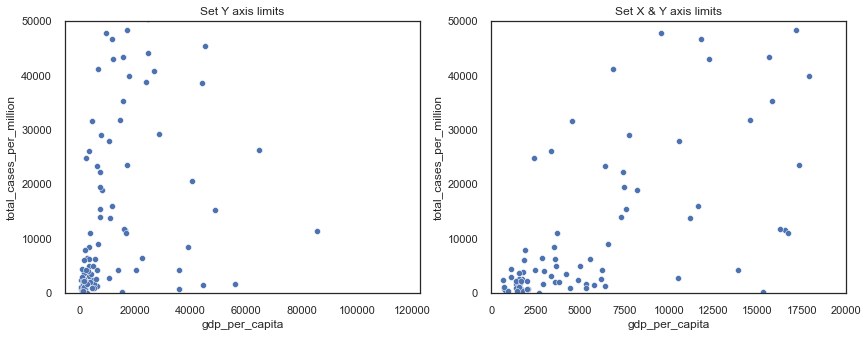

In [6]:
f, axes = plt.subplots(1,2, figsize =(14,5))

# set limit for total cases
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[0])
axes[0].set_ylim([0, 50000])
axes[0].set_title('Set Y axis limits')

# set limit for X and Y
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[1])
axes[1].set_title('Set X & Y axis limits')
axes[1].set_ylim([0, 50000])
axes[1].set_xlim([0, 20000])

plt.show()

````{margin} 
```{admonition} Stretching and Compressing

For most of these figures we are specifying the figure size for readability to avoid the x or y axis becoming overly long or short.

However, you can also deliberately alter how long each axes is compared to one another, called the `aspect ratio` of a figure, if doing so would help your message. If the units are different you generally stretch along the axes where the variation is the most important, in order to better see fluctuations in the variable.

Note that if the units are the same, stretching is misleading and a square figure is preferred.

Expand the below output to see examples of how stretching the axes changes the figure impression.

```
````

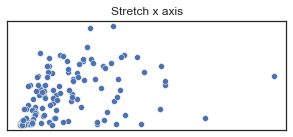

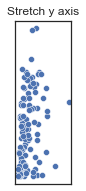

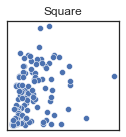

In [25]:
f, ax = plt.subplots(1,1, figsize =(5,2))

# set limit for total cases
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=ax)
ax.set_title("Stretch x axis")
#remove_axes(ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.set_xticks([])
ax.set
plt.show()

f, ax = plt.subplots(1,1, figsize =(1,3))
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=ax)
ax.set_title('Stretch y axis')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.set_xticks([])


plt.show()

f, ax = plt.subplots(1,1, figsize =(2,2))
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=ax)
ax.set_title('Square')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.set_xticks([])
plt.show()

## Scales and Transformations

The above are all **Linear scales**. Meaning that within the axes limits each unit increase in the original data is represented as one unit increase in the figure, regardless of value position along the axes.

It is also common to use **non-linear** scales when the pattern of the data is not well captured by linear scales.

The most recognisable non-linear scale is the **logarithmic scale**. 

````{margin}
```{admonition} The logarithmic scale
The below figure shows how the logarithmic function exaggerates differences at the lower end of a linear scale and squashes data higher up. When applying a log scale you are transform each data point, $x$ to $log(x)$. `np.log()` uses the _natural_ logarithmic function, which returns the power that you would need to raise the natural number $e$ by to get $x$. That is, if $x = e^y$ then $log(x) = y$. Powers are simply sequential multiplication, e.g. $e^3 = e \times e \times e$, meaning that numbers being multiplied get large quickly. At large powers, therefore, you do not need to multiply the number by very much at all to result in big absolute differences, which is why the $log(x)$ function flattens out at as $x$ becomes large. 
```
````




The left figure shows the _total cases_ on the log scale. The natural interpretation is that the difference between 5 and 10 cases is conceptually huge (i.e. it doubles) compared to the difference between 1005 and 1010 cases. The benefits here are that we do not need to exclude data. 


Note that _gdp_per_capita_ remains clustered at low values. Possibly the graph may be clearer if we plotted _gdp per capita_ on the log scale. This makes some sense given the classic phrase _the rich get richer_, meaning that the richer a country is the more resources and investment they have to drive further economic growth.


The right figure plots our data in log-log coordinates. This seems to be the clearest coordinate system for us, and we can see that the total cases increases with GDP per capita. 


<!-- Note to mention truncated axes, custom functions, and when to plot at non-zero --> 

In [8]:
# understanding the log transform. 
x = np.linspace(1,100)
y = np.log(x)
sns.lineplot(x=x, y=y, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('Log(x)')
axes[0].set_title('The Log transform')
plt.show()


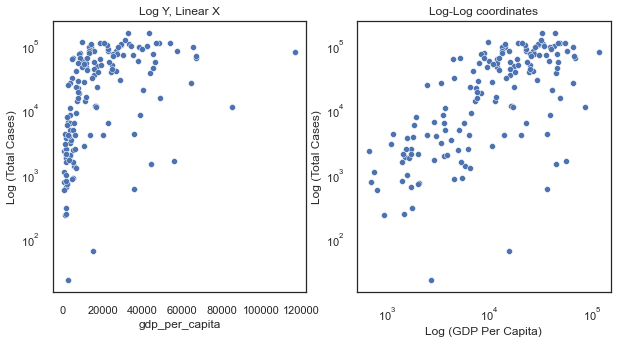

In [9]:
f, axes = plt.subplots(1,2, figsize =(10,5))

def loglog(ax, xscale = 'log', yscale='log', ylab='Log (Total Cases)', xlab = 'Log (GDP Per Capita)'):
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    


# log y-axes
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Log Y, Linear X')
axes[0].set_ylabel('Log (Total Cases)')

# log x-axes and log y-axes
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[1])
loglog(axes[1])
axes[1].set_title('Log-Log coordinates')


plt.show()


# log transform in margin with note.



````{margin}
```{admonition} Scaling is Transforming
When we scale data using a plotting api in can be tempting to think that this is somehow different to transforming the underlying data then plotting without scaling. Both approaches are identical. Scaling is simply applying a function to the data values: $x_s = f(x)$, where $x_s$ is the scaled/transformed value. When calling [set_yscale()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html#matplotlib.axes.Axes.set_yscale) there are some default scales which are well-known functions (e.g. linear is simply $x_s = x$), but you can also apply any custom function.

```
````

## Color Scales

Though our log-log plot shows that there is a slight trend for increased cases for wealthier country, there is much more information we could convey. 

Coordinate systems tend to display two variables at a maximum, otherwise the figure can get cluttered. 

If you want to convey more variables you can use additional scales to add dimensions.

Color is the most common choice. You can use colour to represent both categorical and continuous data.

### Categorical colour

For example, we may want to indicate the spread of countries across the continents, given in the bottom left Figure below.

Colour is much more expressive than shape, as shown by the lack of clarity in the middle example. One could use both (right-most figure), but redundant coding is to be avoided because it forces the reader to do unnecessary work.



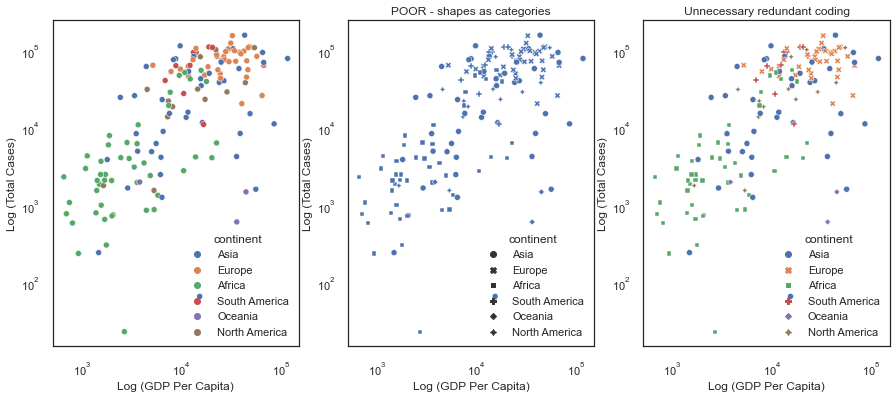

In [10]:
f, axes = plt.subplots(1,3, figsize =(15,6))

# plot with a default palette
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='continent', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel('Log (Total Cases)')
axes[0].set_xlabel('Log (GDP Per Capita)')

sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', style='continent', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel('Log (Total Cases)')
axes[1].set_xlabel('Log (GDP Per Capita)')
axes[1].set_title('POOR - shapes as categories')

sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='continent', style='continent', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_xscale('log')
axes[2].set_ylabel('Log (Total Cases)')
axes[2].set_xlabel('Log (GDP Per Capita)')
axes[2].set_title('Unnecessary redundant coding')

plt.show()

````{margin}
```{admonition} Legend Customisation

By default seaborn maps data labels into the legend and places the legend in a position on the figure where it least interferes with the data. In a lot of cases these defaults are not good enough (for example our continent legend confusingly overlaps a dot representing an Asian country). Fortunately, legends are very customisable, and you will see some minor examples of customising legends throughout the code in this course. For more detailed examples see the matplotlib [legend docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) and [legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html). There are also many blogs available such as [this one](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html).

```
````

### Continuous Colour

We might also want to map data values to a continuous color scale. However, as with any scale the distribution of your data is important.


The plots below assesses whether the size of a country influences the total number of cases. 

The first plot applies a linear scale from Colour values to population. This is not very informative because China and India are so much more populous than the other countries. 

Since we have mapped data values to colour (i.e. applied a **scale**) in much the same way as we have mapped data values to position (in the cartesian coordinate system), we can apply limits or transform the scale.

The middle plot passes a log transform to the colour scale. This is an improvement, but there remains many similar colours in the middle of the colour scale that are hard to distinguish. We want to use more of the extreme ends of the colour scale.

The right plot clips the colour scale at the 10th and 90th percentiles. This reduces the influence of outliers on the scale and helps the readability of the plot by allowing us to pick out the small and large countries.

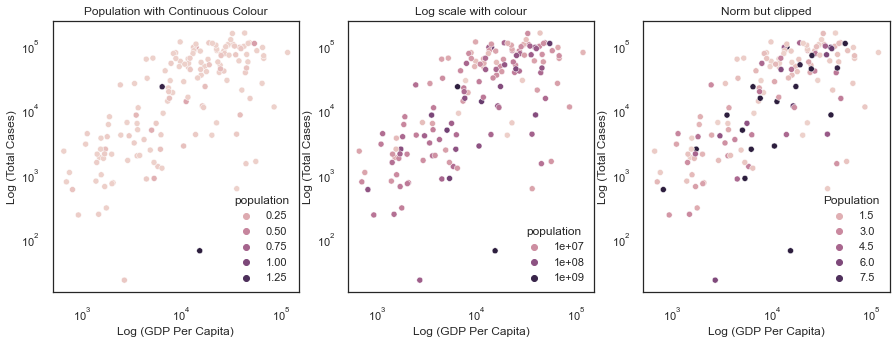

In [11]:
# TODO: make setting the labels into a convenience function 

f, axes = plt.subplots(1,3, figsize =(15,5))

# plot with a default palette
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='population', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_title('Population with Continuous Colour')
axes[0].set_ylabel('Log (Total Cases)')
axes[0].set_xlabel('Log (GDP Per Capita)')



# make our own color_palette.
lognorm = colors.LogNorm(df_totals['population'].min(),df_totals['population'].max())

# log x-axes and log y-axes
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='population', hue_norm = colors.LogNorm(), ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_title('Log scale with colour')
axes[1].set_ylabel('Log (Total Cases)')
axes[1].set_xlabel('Log (GDP Per Capita)')


#normalise with a clip.

# remove nans.
pop_dens = df_totals['population'].dropna()
q_min = np.quantile(pop_dens, .1)
q_max = np.quantile(pop_dens, .9)
norm = colors.Normalize(q_min,
                        q_max,
                       clip=True)

# Seaborn and matplotlib have a bug of not being able to show your own values
# we need to pass the clipped values to `hue`, otherwise matplotlib will not show appropriate values since the legend creator picks linear values between min and max 
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue=np.clip(df_totals['population'].values, q_min, q_max) , hue_norm = norm, ax=axes[2], legend='brief')

axes[2].set_yscale('log')
axes[2].set_xscale('log')
axes[2].set_title('Norm but clipped')
axes[2].set_ylabel('Log (Total Cases)')
axes[2].set_xlabel('Log (GDP Per Capita)')
axes[2].legend(title='Population', loc='lower right')
plt.show()

# TODO: fix legend labels to be in te same units

It is also common to use **size** as an additional dimension.

Since size always has direction if you use size for categorical variables you risk implying a false order. You should therefore only use size for a continuous scale.

In the below figure we use size to indicate total deaths. By doing this we can begin assessing countries that did comparatively well in managing high case numbers. Look at the bottom left.

Let's pause a moment. There is quite a lot to consider in this plot. We are asking quite a lot of the reader. Reflect on what we want to investigate - do richer countries deal better with cases, and how is this spread across the world? 

Sometimes it is worth reconsidering your axes to bring clarity to your message. In order of information importance it should be: 
- Position
- Colour
- Size

Here, the total cases and total deaths are more important, so they should be on the position scales. 

The right-most figure gives an adjusted figure. Exactly the same data presented in a different way.

````{margin}
```{warning}
**Overplotting**. Do not underestimate the difficulty of intepreting visualisations. Here we use multiple scales for demonstration purposes, but in practice these figures are a little cluttered and unintuitive. One would think of ways of reducing the complexity of the figure. In this example, an ordered bar or dot chart (see _Section 3.3_) plotting the ratio of `total_cases_per_million / total_deaths_per_million` would be a cleaner graph. 
```
````


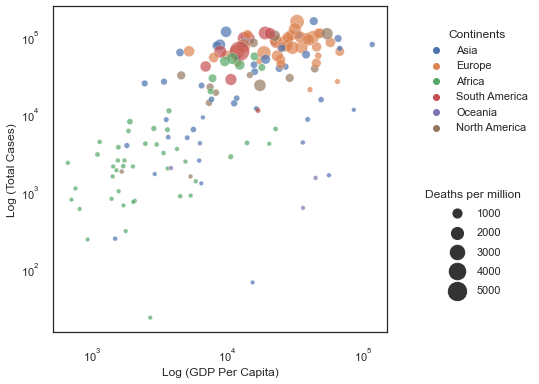

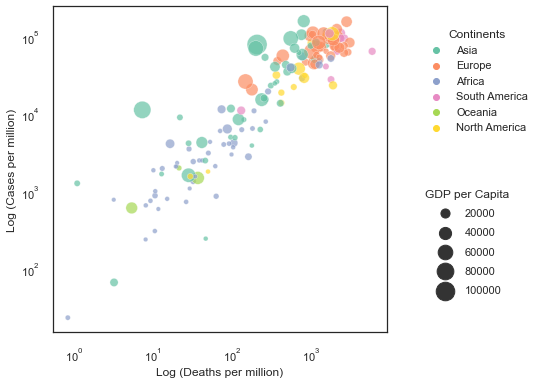

In [18]:
f, ax = plt.subplots(1,1, figsize=(6,6))
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', size='total_deaths_per_million', sizes=(20,400), hue='continent', legend='brief', ax=ax, alpha = .7)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Log (Total Cases)')
ax.set_xlabel('Log (GDP Per Capita)')

# separate legends
# solution retreived from https://stackoverflow.com/questions/56456956/separate-seaborn-legend-into-two-distinct-boxes
h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h[1:7],l[1:7], loc=(1.1,.6), title='Continents')
l2 = ax.legend(h[8:],l[8:], loc=(1.1, .1), title='Deaths per million', labelspacing=.85)
ax.add_artist(l1)



plt.show()

f, ax = plt.subplots(1,1, figsize=(6,6))
sns.scatterplot(data=df_totals, x = 'total_deaths_per_million', y = 'total_cases_per_million', size='gdp_per_capita', sizes=(20,400), hue='continent', legend='brief', ax=ax, alpha = .7, palette="Set2")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Log (Cases per million)')
ax.set_xlabel('Log (Deaths per million)')
ax.legend(title='Continent', loc='lower right')

h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h[1:7],l[1:7], loc=(1.1,.6), title='Continents')
l2 = ax.legend(h[8:],l[8:], loc=(1.1, .1), title='GDP per Capita', labelspacing=.85)
ax.add_artist(l1)


plt.show()



### Colour schemes

There is a rich selection of research projects into which colours to use for your figures. A good overview of the key considerations when picking a color is giving in the seaborn tutorial of [choosing a color palette](https://seaborn.pydata.org/tutorial/color_palettes.html). 

If you are wanting palettes it is good to go for a well-researched palettes. For example from [Color Brewer](https://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=3) have useful palettes that are distinct in black and white (and for colorblind individuals) for:
- Sequential data ([perceptually uniform palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes) are often best here to avoid different parts of the scale popping out
- Diverging data
- Qualitative/Categorical data.

If you want to select your own colours that complement one another, useful resources are the [xkcd color survey](https://xkcd.com/color/rgb/), and the [Color Calculator](https://www.sessions.edu/color-calculator/).

There is also this fantastic blog by [Lisa from Datawrapper](https://blog.datawrapper.de/beautifulcolors/), which contains a lot of useful design tips and resources.



### Colour to highlight

In addition to using Color as a categorical or continuous measure, you can also use color as a tool to bring the readers attention to those areas that you are interested in. For example, if we were interested only the UK and surrounded countries, we could could grey all the other countries out (e.g. see Andy Kirk's blog about the [benefits of using grey](https://www.visualisingdata.com/2015/01/make-grey-best-friend/). 



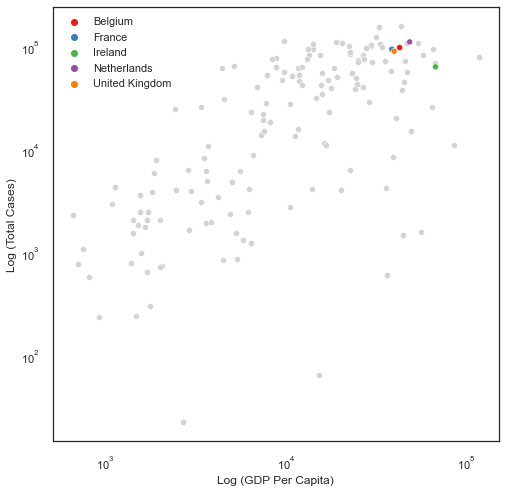

In [13]:
countries = ['United Kingdom','Ireland','France','Belgium','Netherlands']
other = 'Rest of World'
df_totals = df_totals.assign(highlight = [loc if loc in countries else other
                                       for loc in df_totals.index])

# pick a list of colours
cmap = sns.color_palette("Set1", n_colors=len(set(df_totals.highlight.values))-1)

f, ax = plt.subplots(1,1, figsize = (8,8))

# plot grey first so that the highlighted values are on top
sns.scatterplot(data=df_totals.query("highlight == @other"), x = 'gdp_per_capita', y = 'total_cases_per_million', color='lightgray')
sns.scatterplot(data=df_totals.query("highlight in @countries"), x = 'gdp_per_capita', y = 'total_cases_per_million', hue='highlight', palette=cmap)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Log (Total Cases)')
ax.set_xlabel('Log (GDP Per Capita)')
ax.legend(title='')
plt.show()

### Annotations: labels, legends, titles


In constructing our plot so far we have been lazy with the labelling and legend creation. 

You should **always** consider whether your chart title and labels are descriptive enough, and whether you could add other annotations that not only describe what is being measured but also why the reader should care about the chart.

Appropriate titles, labels, and annotations avoid misinterpretation and save time for the chart reader. 

## Further Examples

These further examples combine our previously covered knowledge of position scales and colour with appropriate annotations to bring clarity to the story.
 
### Coordinate systems for Time Series

The following figures show two ways of plotting a time series. In this case, _Case numbers per 10,000_. We also demonstrate interactive plot annotations using `plotly`. 


<!-- Camila's plots, with commentary of the different axes --> 

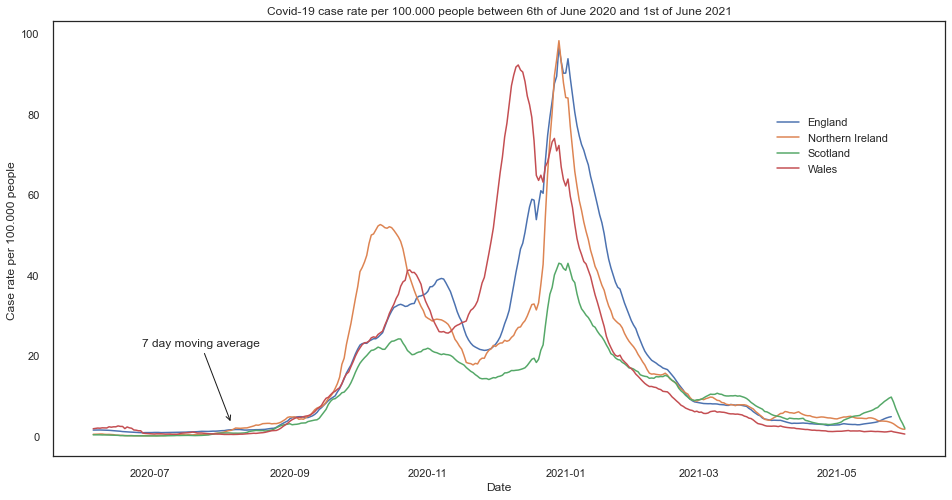

In [27]:
from datetime import datetime
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

plt.rcParams["figure.figsize"] = (16, 8)
df_uk_cases = pd.read_csv('../data/data_2021-Aug-01.csv', sep=',', parse_dates=['date'])

# select 1 year data (360 days)
df_uk_cases_1y = df_uk_cases[(df_uk_cases['date']>='2020-06-06') & (df_uk_cases['date']<'2021-06-01')].copy()

# normalise case per population
def normalise(cases,country):
    # population estimates from https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland
    norm =  {'England': 56550138, 'Wales': 3169586, 'Scotland': 5466000, 'Northern Ireland': 1895510}
    return cases / norm[country] *100000

df_uk_cases_1y['casesNormalised'] = df_uk_cases_1y.apply(lambda row: normalise(row.newCasesBySpecimenDate, row.areaName),axis=1)

# rolling mean of 1 week
df_uk_cases_1y['cases'] = df_uk_cases_1y['casesNormalised'].rolling(window=7).mean()

# Plotting typical time series plot
sns.lineplot(data=df_uk_cases_1y,x='date',y='cases',hue='areaName',legend='full')
plt.xlabel("Date")
plt.ylabel("Case rate per 100.000 people ")
# add title
plt.title('Covid-19 case rate per 100.000 people between 6th of June 2020 and 1st of June 2021')
plt.legend(bbox_to_anchor=(.80, 0.8), loc=2);


## annotations
plt.annotate(text="7 day moving average", xy=(.2,.075), xytext=(.1,.25), arrowprops={"arrowstyle":"->",
                                                                                    "color":'k',}, 
             xycoords='axes fraction', textcoords='axes fraction')

plt.show()

# Plotting polar figure
df_uk_cases_1y['dayofyear'] = df_uk_cases_1y['date'].apply(lambda x: x.strftime("%d/%m/%Y"))

fig = px.line_polar(df_uk_cases_1y, r='cases', theta='dayofyear', start_angle=100+180, direction='counterclockwise',
                    color='areaName', line_close=False,
                    title='Covid-19 case rate per 100.000 people between 1st of June 2020 and 25th of May 2021',
                    width=800, height=800,
                    labels={
                        "casesNormalised": "Case rate per 100.000 people ",
                        "dayofyear": "Date",
                        "areaName": "UK nation",
                    },
                    )
fig.update_polars(angularaxis_type="category",radialaxis=dict(visible=True),
angularaxis = dict(
        thetaunit = "degrees",
        dtick =15
      ))

fig

## Central role for Colour

In this example we show two powerful methods of using colour to convey how vaccination rates varies depending on political voting in the United States.



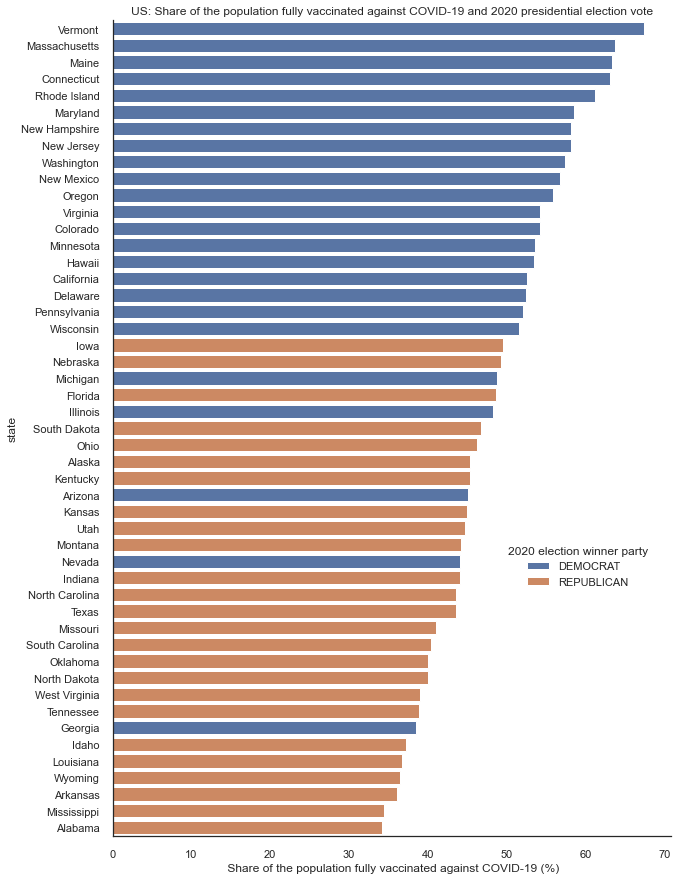

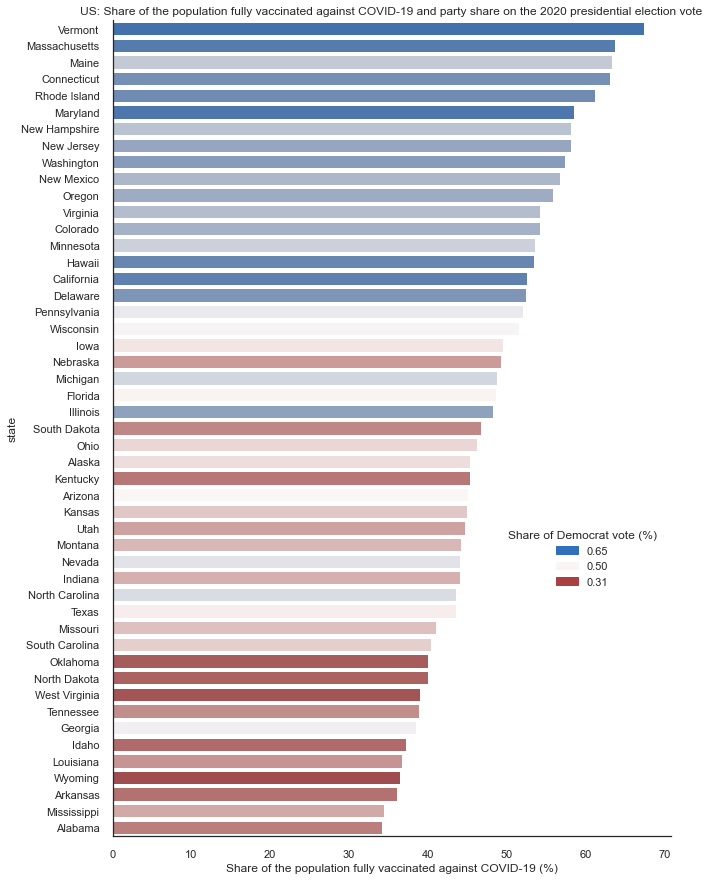

In [15]:
import matplotlib.patches as mpatches
# read the data from here https://ourworldindata.org/us-states-vaccinations
df_vaccination = pd.read_csv('../data/us-covid-share-fully-vaccinated.csv', sep=',', parse_dates=['Day'])

# look at max day avalaible for cumulative vaccination data
max_day = df_vaccination['Day'].max()
df_vaccination_max = df_vaccination[df_vaccination['Day']==max_day]

# get election data from here https://dataverse.harvard.edu/file.xhtml?fileId=4299753&version=6.0
df_president_2020 = pd.read_csv('../data/2020-president.csv', sep=',')

df_president_2020 = df_president_2020[df_president_2020['year']==2020]

# making sure state names are compatible between datasets
df_president_2020['state'] = df_president_2020['state'].str.title()
# calculate percentage of votes for a party
df_president_2020['party_percentage'] = df_president_2020['candidatevotes']/df_president_2020['totalvotes']

# only select data from the winner party
index_list = []
for state in np.unique(df_president_2020['state']):
   max = df_president_2020[df_president_2020['state']==state]['party_percentage'].max()
   index =  (df_president_2020[(df_president_2020['state'] == state) & (df_president_2020['party_percentage']==max)].index.values[0])
   index_list.append(index)
df_president_2020_party = df_president_2020.loc[index_list]

# join the datasets
df_joined = pd.merge(df_vaccination_max,df_president_2020_party[['state','party_simplified','party_percentage']],left_on='Entity',right_on='state',how='inner')

# make percentage as a share of democrat vote (this is not 100% right, we don't consider other parties, however they are negligible).
df_joined.loc[df_joined[df_joined['party_simplified']=='REPUBLICAN'].index,'party_percentage'] = 1- df_joined[df_joined['party_simplified']=='REPUBLICAN']['party_percentage']
df_joined.sort_values(by='people_fully_vaccinated_per_hundred',inplace=True, ascending=False)


## PLOTS

# Use color a category
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_style("white")

f, ax = plt.subplots(figsize=(10, 15))
# Load the dataset
ax = sns.barplot(x="people_fully_vaccinated_per_hundred", y="state", data=df_joined,hue='party_simplified',dodge=False)
ax.set_title('US: Share of the population fully vaccinated against COVID-19 and 2020 presidential election vote',fontsize=12)
ax.set_xlabel(' Share of the population fully vaccinated against COVID-19 (%)')
ax.legend(title="2020 election winner party", loc=(.7,.3))
sns.despine(left=False, bottom=False)
plt.show()

# Use color a scale
f2, ax2 = plt.subplots(figsize=(10, 15))
n = len(df_joined.state)
cmap = sns.color_palette("vlag_r", n_colors=n)
# Load the example car crash dataset
ax2 = sns.barplot(x="people_fully_vaccinated_per_hundred", y="state", data=df_joined,hue='party_percentage',dodge=False,palette=cmap)
ax2.set_title('US: Share of the population fully vaccinated against COVID-19 and party share on the 2020 presidential election vote',fontsize=12)
ax2.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
sns.despine(left=False, bottom=False)
# Add a legend and informative axis label
sns.despine(left=False, bottom=False)
# Create a new legend
party_min = mpatches.Patch(color=cmap[0], label='{:.2f}'.format(df_joined['party_percentage'].min()))
party_med = mpatches.Patch(color=cmap[round(n/2)], label='{:.2f}'.format(.5))
party_max = mpatches.Patch(color=cmap[-1], label='{:.2f}'.format(df_joined['party_percentage'].max()))
ax2.legend(handles=[party_max,party_med,party_min],title='Share of Democrat vote (%)', loc=(.7,.3))
plt.show()

# Aggregation

Beware of overplotting! There is only so much information that is useful in a plot. Often the variability in raw data obscures the message.

A powerful tool is aggregation. Aggregation involves applying calculations on your data set in order to collapse your data to a representative variable (for example, an average). 

One should always take care when aggregating. There is a balance between reducing data information too far and miscommunicating trends on one hand, and not reducing data enough and overloading the reader on the other.

Here we show two forms of aggregation. The first, case numbers of Englad, we have already seen -the moving average. Here the balance between reduction and complexity is given in the window in which you average over.

The second, European Life Expectancy is a common way of using aggregation in the form of _binning_ to use. The balance here is in the size of the bins.


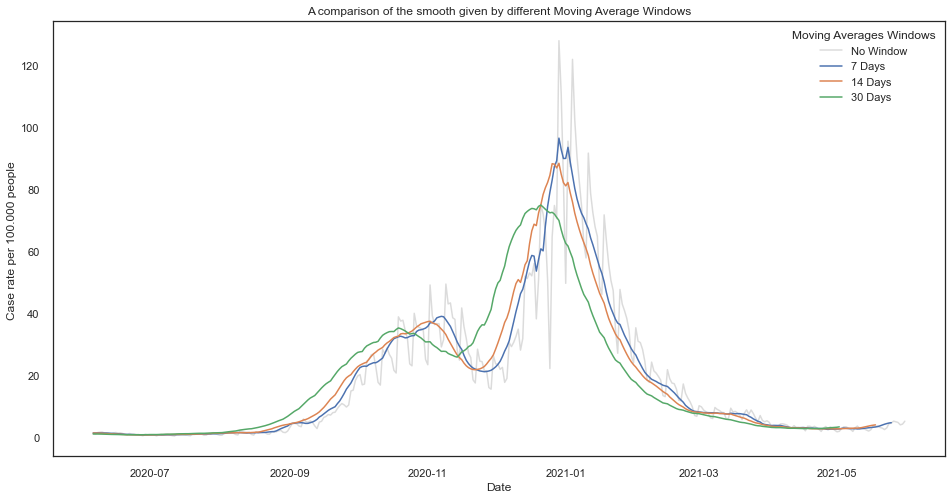

In [16]:
windows = [7,14,30]

# Plotting typical time series plot with different average windows
df_eng = df_uk_cases_1y.query("areaName == 'England'")
sns.lineplot(data = df_eng, x = 'date', y='casesNormalised', color = "lightgray", label='No Window', alpha = .8)
for w in windows:
    y = df_eng['casesNormalised'].rolling(window=w).mean()
    sns.lineplot(x=df_eng.date.values,y=y,label=f"{w} Days")
    
plt.xlabel("Date")
plt.ylabel("Case rate per 100.000 people ")
plt.legend(title='Moving Averages Windows')
plt.title('A comparison of the smooth given by different Moving Average Windows')
plt.show()

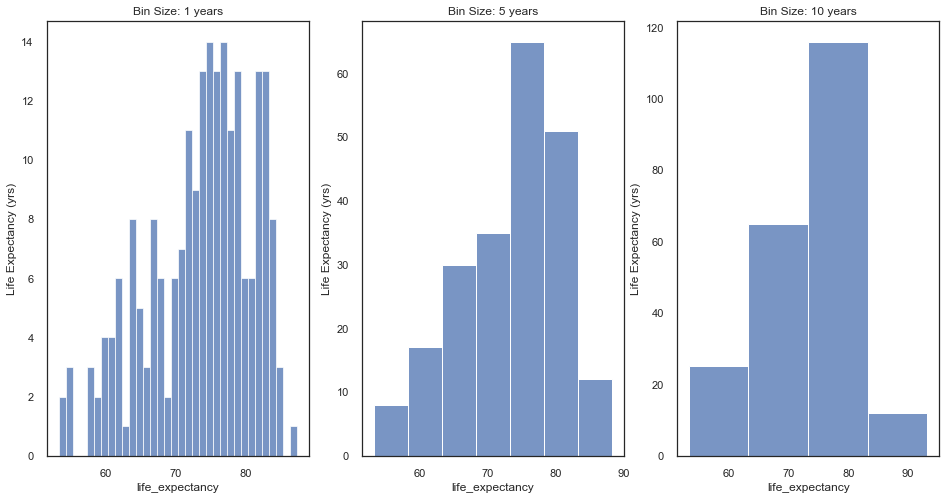

In [17]:
df_life_exp = df_countries.filter(regex="loc|life *").drop_duplicates()

f, axes = plt.subplots(1,3)

bin_years = [1,5,10]

for (i, b) in enumerate(bin_years):
    sns.histplot(data = df_life_exp, x='life_expectancy', binwidth=b, ax=axes[i])
    axes[i].set_title(f"Bin Size: {b} years")
    axes[i].set_ylabel('Life Expectancy (yrs)')
                    
    
plt.show()

## Hands-on Session (15 mins)

Practice building a figure.

Explore the world in data dataset. You are free to use the full dataset (`df`), which has entries for many dates, or the aggregated dataset which only have the totals (`df_totals`). 

- Look at the variables (`print(df.columns)`)
- Decide what relationship (s) you want to assess
- Use a lineplot `sns.lineplot` or a scatter plot `sns.scatterplot` to visualise your relationship (see also `sns.relplot`).
    - feel free to try other plots if you have spare time (see [seaborn tutorials](https://seaborn.pydata.org/tutorial.html)), but we will be covering a wider variety of plots in the next section.
- Choose which variables you want on the x and y axes. If needed, incorporate colour, size, or alpha.
- Change the axes labels and title.
- Ask yourself:
    - are the scales and limits appropriate? 
    - are there any improvements to make for clarity?
    - are there any points of confusion? 

Work in groups of 4. Allocate yourself a 'driver' (someone to code, though this does not preclude others following along). If you make multiple plots you can rotate drivers. 




